## Importing Libraries and dataset

In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

In [2]:
votes=pd.read_csv("https://raw.githubusercontent.com/chirayuparikh/CU-DTSA-5509/main/LS_2.0.csv")

## Check dataframe coloums, datatypes and emply values

In [3]:
list(votes.columns)

['STATE',
 'CONSTITUENCY',
 'NAME',
 'WINNER',
 'PARTY',
 'SYMBOL',
 'GENDER',
 'CRIMINAL\nCASES',
 'AGE',
 'CATEGORY',
 'EDUCATION',
 'ASSETS',
 'LIABILITIES',
 'GENERAL\nVOTES',
 'POSTAL\nVOTES',
 'TOTAL\nVOTES',
 'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
 'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY',
 'TOTAL ELECTORS']

In [4]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

## Identifying the Null values in the columns

In [5]:
votes.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

## Renaming the columns

In [6]:
votes.rename(columns={"CRIMINAL\nCASES": "CRIMINAL CASES", "GENERAL\nVOTES": "GENERAL VOTES", "POSTAL\nVOTES": "POSTAL VOTES","TOTAL\nVOTES": "TOTAL VOTES","OVER TOTAL ELECTORS \nIN CONSTITUENCY": "OVER TOTAL ELECTORS IN CONSTITUENCY","OVER TOTAL VOTES POLLED \nIN CONSTITUENCY": "OVER TOTAL VOTES POLLED IN CONSTITUENCY"}, inplace=True)
votes.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


## Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

In [7]:
def value_cleaner(x):
    try:
        str_temp = (x.split('Rs')[1].split('\n')[0].strip())
        str_temp_2 = ''
        for i in str_temp.split(","):
            str_temp_2 = str_temp_2+i
        return str_temp_2
    except:
        x = 0
        return x
votes['ASSETS'] = votes['ASSETS'].apply((value_cleaner))
votes['LIABILITIES'] = votes['LIABILITIES'].apply((value_cleaner))
votes.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690


## Cleaning up the Educational Qualification of the contestants

In [8]:
votes.EDUCATION.unique()

array(['12th Pass', 'Post Graduate', nan, 'Doctorate', 'Graduate',
       'Others', '10th Pass', '8th Pass', 'Graduate Professional',
       'Literate', 'Illiterate', '5th Pass', 'Not Available',
       'Post Graduate\n'], dtype=object)

In [9]:
votes.EDUCATION.replace({'Post Graduate\n':'Post Graduate'},inplace=True)
votes.EDUCATION.unique()

array(['12th Pass', 'Post Graduate', nan, 'Doctorate', 'Graduate',
       'Others', '10th Pass', '8th Pass', 'Graduate Professional',
       'Literate', 'Illiterate', '5th Pass', 'Not Available'],
      dtype=object)

In [10]:
votes.dtypes

STATE                                       object
CONSTITUENCY                                object
NAME                                        object
WINNER                                       int64
PARTY                                       object
SYMBOL                                      object
GENDER                                      object
CRIMINAL CASES                              object
AGE                                        float64
CATEGORY                                    object
EDUCATION                                   object
ASSETS                                      object
LIABILITIES                                 object
GENERAL VOTES                                int64
POSTAL VOTES                                 int64
TOTAL VOTES                                  int64
OVER TOTAL ELECTORS IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED IN CONSTITUENCY    float64
TOTAL ELECTORS                               int64
dtype: object

In [11]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   STATE                                    2263 non-null   object 
 1   CONSTITUENCY                             2263 non-null   object 
 2   NAME                                     2263 non-null   object 
 3   WINNER                                   2263 non-null   int64  
 4   PARTY                                    2263 non-null   object 
 5   SYMBOL                                   2018 non-null   object 
 6   GENDER                                   2018 non-null   object 
 7   CRIMINAL CASES                           2018 non-null   object 
 8   AGE                                      2018 non-null   float64
 9   CATEGORY                                 2018 non-null   object 
 10  EDUCATION                                2018 no

## Identifying Discrepancy entries in the columns

In [12]:
votes[votes['CRIMINAL CASES']=='Not Available'].head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
468,Bihar,BUXAR,Ramchandra Singh Yadav,0,IND,Almirah,MALE,Not Available,42.0,GENERAL,Not Available,0,0,10721,9,10730,0.586540,1.087175,1829373
532,Tamil Nadu,CHIDAMBARAM,SIVAJOTHI M,0,NTK,Ganna Kisan,MALE,Not Available,35.0,SC,Not Available,0,0,37329,142,37471,2.531445,3.246331,1480222
612,Uttar Pradesh,DEORIA,BINOD KUMAR JAISWAL,0,BSP,Elephant,MALE,Not Available,56.0,GENERAL,Not Available,0,0,327728,2985,330713,18.852693,32.563441,1754195
613,Uttar Pradesh,DEORIA,NIYAZ AHMED,0,INC,Hand,MALE,Not Available,57.0,GENERAL,Not Available,0,0,50749,307,51056,2.910509,5.027196,1754195
654,Tamil Nadu,DINDIGUL,"JOTHIMUTHU, K.",0,PMK,Mango,MALE,Not Available,48.0,GENERAL,Not Available,0,0,206782,769,207551,13.460896,17.877979,1541881


## Updating the data types for better analysis

In [13]:
votes['ASSETS']=pd.to_numeric(votes['ASSETS'])
votes['LIABILITIES']=pd.to_numeric(votes['LIABILITIES'])
votes['CRIMINAL CASES'].replace({np.NaN:0})
votes['CRIMINAL CASES'] = pd.to_numeric(votes['CRIMINAL CASES'], errors='coerce').fillna(0).astype(np.int64)

## The Number of Constituencies from each State

Text(0, 0.5, 'STATE')

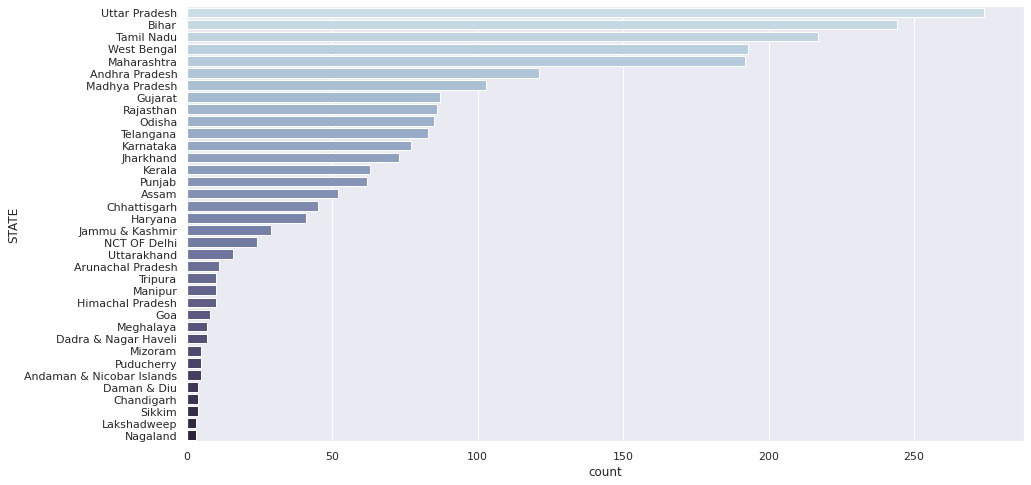

In [14]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
L1=list(votes["STATE"].value_counts().keys())
L2=list(votes["STATE"].value_counts())
sns.barplot(data=votes,x=L2,y=L1,palette="ch:s=.25,rot=-.25")
plt.xlabel("count")
plt.ylabel("STATE")

## Education Level of the Candidates

Text(0.5, 1.0, 'Education Level of the Candidates')

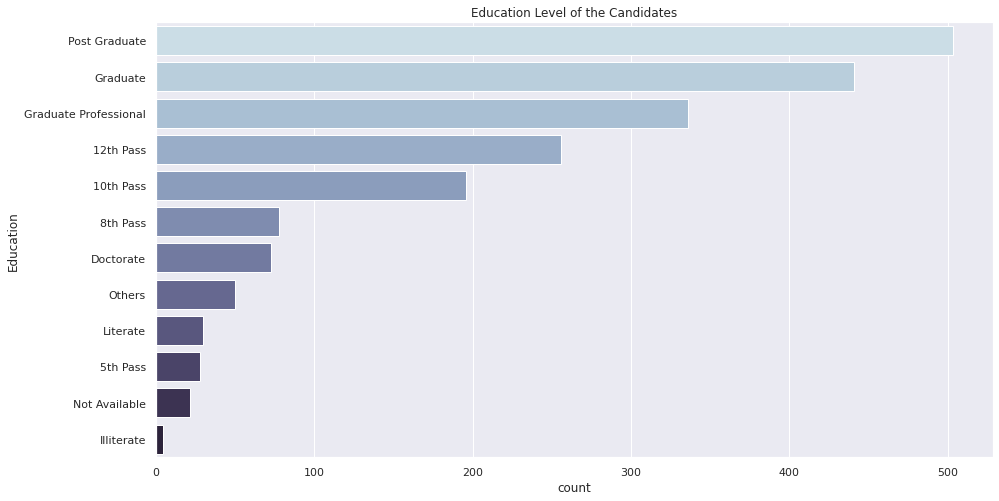

In [15]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
L3=list(votes["EDUCATION"].value_counts().keys())
L4=list(votes["EDUCATION"].value_counts())
sns.barplot(data=votes,x=L4,y=L3,palette="ch:s=.25,rot=-.25")
plt.xlabel("count")
plt.ylabel("Education")
plt.title("Education Level of the Candidates")

## Winning Candidates with highest Educational Degree

Text(0.5, 1.0, 'Winning Candidates with highest Educational Degree')

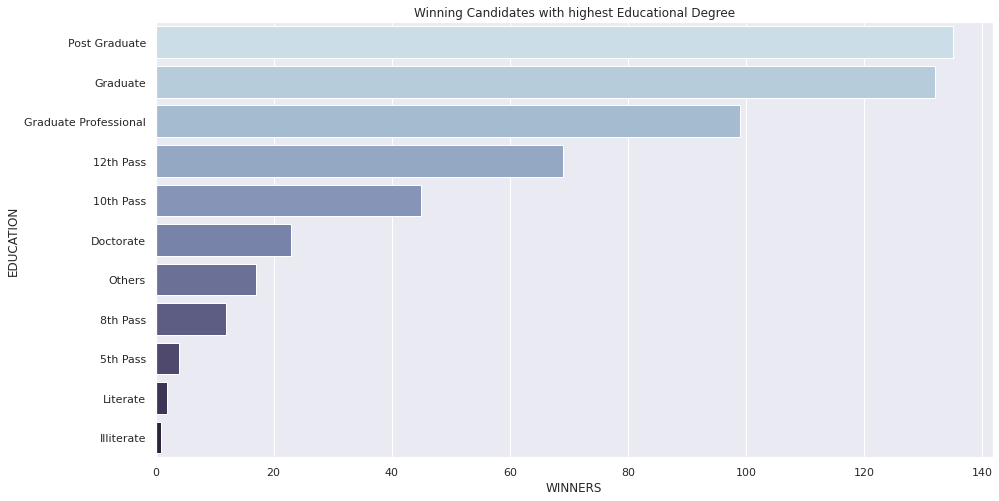

In [16]:
winner = votes[votes['WINNER']==1]
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
L5=list(winner["EDUCATION"].value_counts().keys())
L6=list(winner["EDUCATION"].value_counts())
sns.barplot(data=votes,x=L6,y=L5,palette="ch:s=.25,rot=-.25")
plt.xlabel("WINNERS")
plt.ylabel("EDUCATION")
plt.title("Winning Candidates with highest Educational Degree")

## Youngest Winning Candiates

In [17]:
young=winner[winner["AGE"]<=30]
young.shape

(7, 19)

In [18]:
young.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
138,Andhra Pradesh,ARUKU,GODDETI. MADHAVI,1,YSRCP,Ceiling Fan,FEMALE,0,26.0,ST,Graduate Professional,141179,0,557561,4629,562190,38.733845,52.139840,1451418
243,Karnataka,BANGALORE SOUTH,TEJASVI SURYA,1,BJP,Lotus,MALE,0,28.0,GENERAL,Graduate Professional,1346593,0,736605,2624,739229,33.366404,62.137994,2215489
326,West Bengal,BASIRHAT,Nusrat Jahan Ruhi,1,AITC,Flowers and Grass,FEMALE,0,28.0,GENERAL,12th Pass,29088391,16881608,781920,158,782078,46.597833,54.547002,1678357
853,Karnataka,HASSAN,PRAJWAL REVANNA,1,JD(S),A lady farmer carrying paddy on her head,MALE,0,28.0,GENERAL,Graduate Professional,97848632,37253210,675512,1094,676606,40.932027,52.915529,1652999
916,West Bengal,JADAVPUR,MIMI CHAKRABORTY,1,AITC,Flowers and Grass,FEMALE,0,30.0,GENERAL,Graduate,24398786,1900788,687773,699,688472,37.893571,47.900935,1816857


## Oldest Winning Candidates

In [19]:
old=winner[winner["AGE"]>=75]
old=old.sort_values(by=["AGE"],ascending=True)
old.shape

(11, 19)

In [20]:
old.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
1457,Maharashtra,MUMBAI NORTH WEST,Gajanan Kirtikar,1,SHS,Bow and Arrow,MALE,0,75.0,GENERAL,Graduate,105392000,4032000,569018,1045,570063,32.908571,60.527101,1732263
535,Karnataka,CHIKKBALLAPUR,B.N.Bache Gowda,1,BJP,Lotus,MALE,0,76.0,GENERAL,Graduate Professional,1153501141,0,744475,1437,745912,41.238404,53.740561,1808780
1086,West Bengal,KANTHI,Adhikari Sisir,1,AITC,Flowers and Grass,MALE,3,77.0,GENERAL,12th Pass,33979650,0,711233,639,711872,42.880058,49.957122,1660147
1664,Tamil Nadu,PERAMBALUR,"Dr.PAARIVENDHAR, T. R",1,DMK,Rising Sun,MALE,2,77.0,GENERAL,Post Graduate,972730368,65935070,677005,6692,683697,49.121351,61.976232,1391853
2010,Tamil Nadu,SRIPERUMBUDUR,Baalu.T.R.,1,DMK,Rising Sun,MALE,0,77.0,GENERAL,Graduate,208806446,0,790750,2531,793281,35.202987,56.374893,2253448


## Age distribution of Candidates

<AxesSubplot:xlabel='AGE', ylabel='Count'>

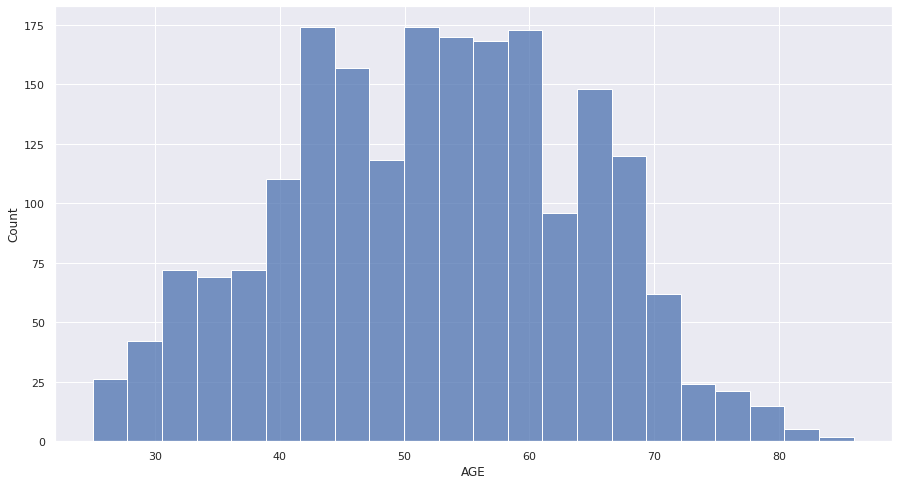

In [21]:
plt.figure(figsize=(15,8))
sns.histplot(data=votes,x="AGE",palette="ch:s=.25,rot=-.25")

## Total Criminal Cases by respective parties

In [22]:
politics=votes[votes["CRIMINAL CASES"]!="Not Available"]
politics["CRIMINAL CASES"]=pd.to_numeric(politics["CRIMINAL CASES"])

criminal_cases = votes.groupby('PARTY')['CRIMINAL CASES'].sum().reset_index().sort_values('CRIMINAL CASES',ascending=False).head(30)

Text(0, 0.5, 'PARTY')

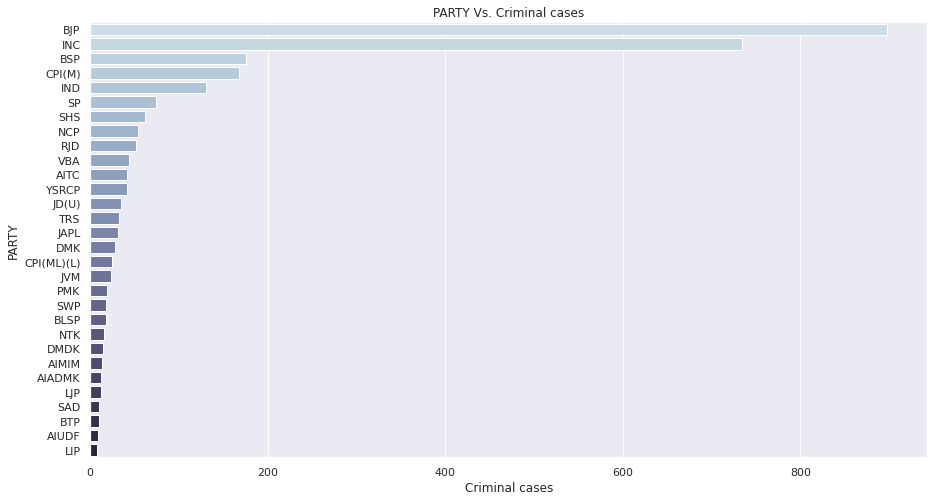

In [23]:
plt.figure(figsize=(15,8))
plt.title("PARTY Vs. Criminal cases")
sns.barplot(data=criminal_cases,x="CRIMINAL CASES",y="PARTY",palette="ch:s=.25,rot=-.25")
plt.xlabel("Criminal cases")
plt.ylabel("PARTY")

Top 5 Winners with most Criminal Cases

In [24]:
winner["CRIMINAL CASES"]=pd.to_numeric(winner["CRIMINAL CASES"])
politics_cri=winner[winner["CRIMINAL CASES"]!=0]
politics_cri=politics_cri.sort_values(by=["CRIMINAL CASES"],ascending=False)
politics_cri.head()

/tmp/ipykernel_6437/1313674846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winner["CRIMINAL CASES"]=pd.to_numeric(winner["CRIMINAL CASES"])


,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
903,Kerala,IDUKKI,Adv. DEAN KURIAKOSE,1,INC,Hand,MALE,204,37.0,GENERAL,Post Graduate,13395011,10000000,497697,796,498493,41.396506,54.210007,1204191
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1361,Telangana,MALKAJGIRI,ANUMULA REVANTH REDDY,1,INC,Hand,MALE,42,51.0,GENERAL,Graduate,245357182,27807304,602907,841,603748,19.164699,38.611553,3150313
321,West Bengal,BARRACKPORE,ARJUN SINGH,1,BJP,Lotus,MALE,24,57.0,GENERAL,10th Pass,8055691,1100000,471490,1504,472994,32.928418,42.816550,1436431
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,1287851556,11535000,434066,178,434244,28.975369,41.574183,1498666


## Female Winners from different Party

In [25]:
Female_winner=winner[winner["GENDER"]=="FEMALE"]

Text(0.5, 1.0, 'Female Winners from different Party')

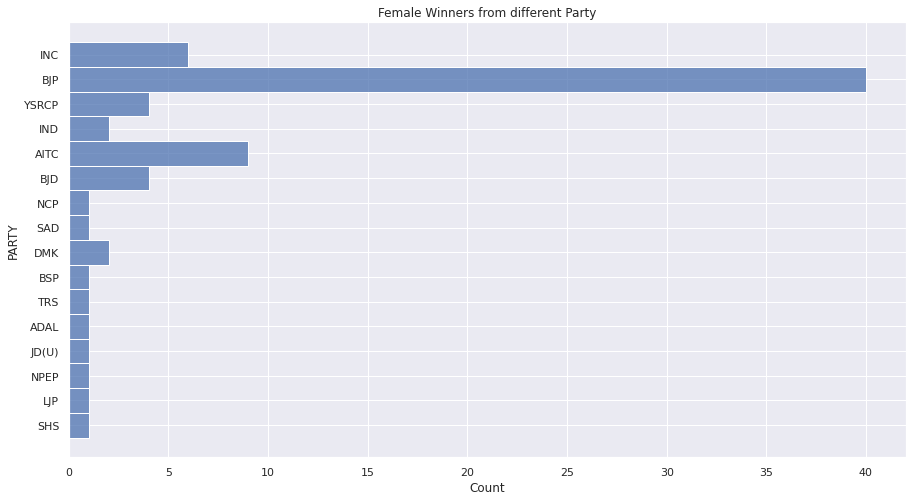

In [26]:
plt.figure(figsize=(15,8))
sns.histplot(data=Female_winner,y="PARTY",palette="ch:s=.25,rot=-.25")
plt.title("Female Winners from different Party")

## Female Winners from different States

Text(0.5, 1.0, 'Female Winners from different States')

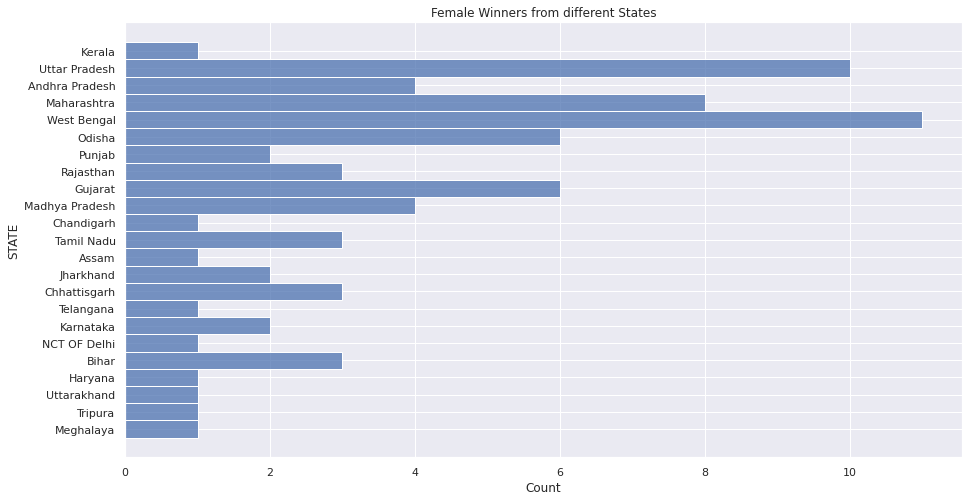

In [27]:
plt.figure(figsize=(15,8))
sns.histplot(data=Female_winner,y="STATE",palette="ch:s=.25,rot=-.25")
plt.title("Female Winners from different States")

## Spread of the top 10 political parties of India statewise

In [28]:
politics['PARTY'].value_counts()[0:10]

BJP       420
INC       413
NOTA      245
IND       201
BSP       163
CPI(M)    100
VBA        47
AITC       47
SP         39
NTK        38
Name: PARTY, dtype: int64

In [29]:
bjp=politics[politics["PARTY"]=="BJP"].STATE.value_counts().reset_index()
inc=politics[politics["PARTY"]=="INC"].STATE.value_counts().reset_index()
ind=politics[politics["PARTY"]=="IND"].STATE.value_counts().reset_index()
bsp=politics[politics["PARTY"]=="BSP"].STATE.value_counts().reset_index()
cpi=politics[politics["PARTY"]=="CPI(M)"].STATE.value_counts().reset_index()
vba=politics[politics["PARTY"]=="VBA"].STATE.value_counts().reset_index()
aitc=politics[politics["PARTY"]=="AITC"].STATE.value_counts().reset_index()
sp=politics[politics["PARTY"]=="SP"].STATE.value_counts().reset_index()
mnm=politics[politics["PARTY"]=="MNM"].STATE.value_counts().reset_index()
ntk=politics[politics["PARTY"]=="NTK"].STATE.value_counts().reset_index()

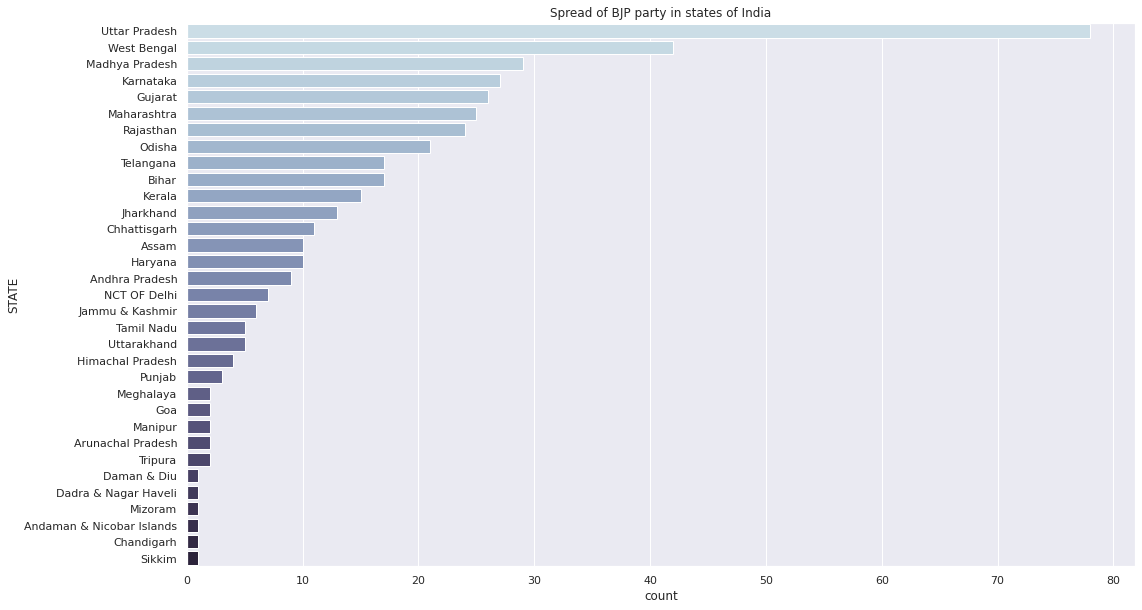

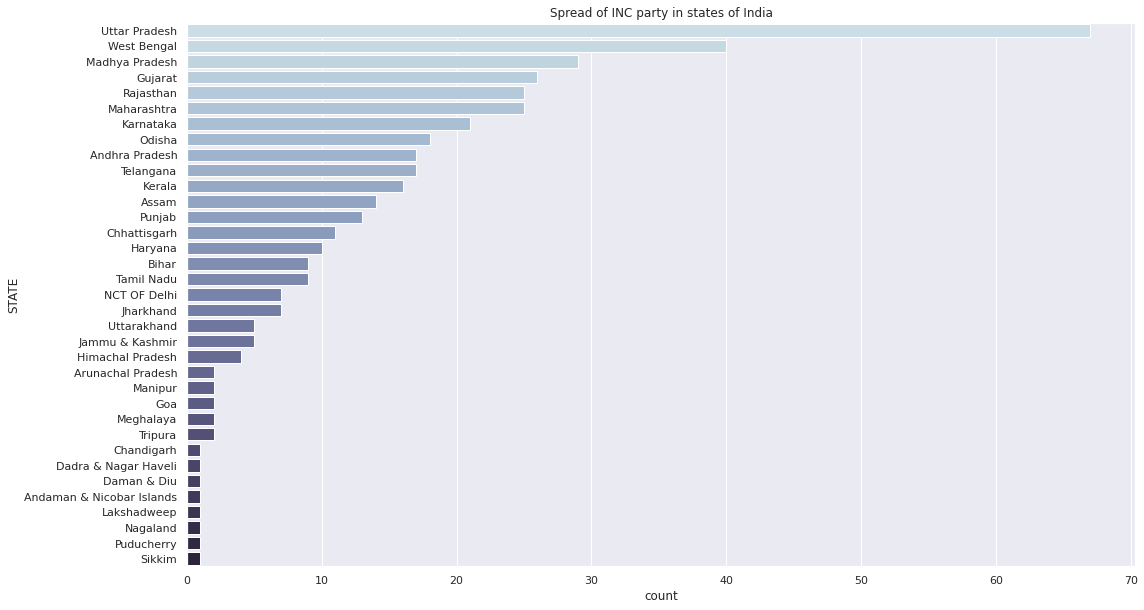

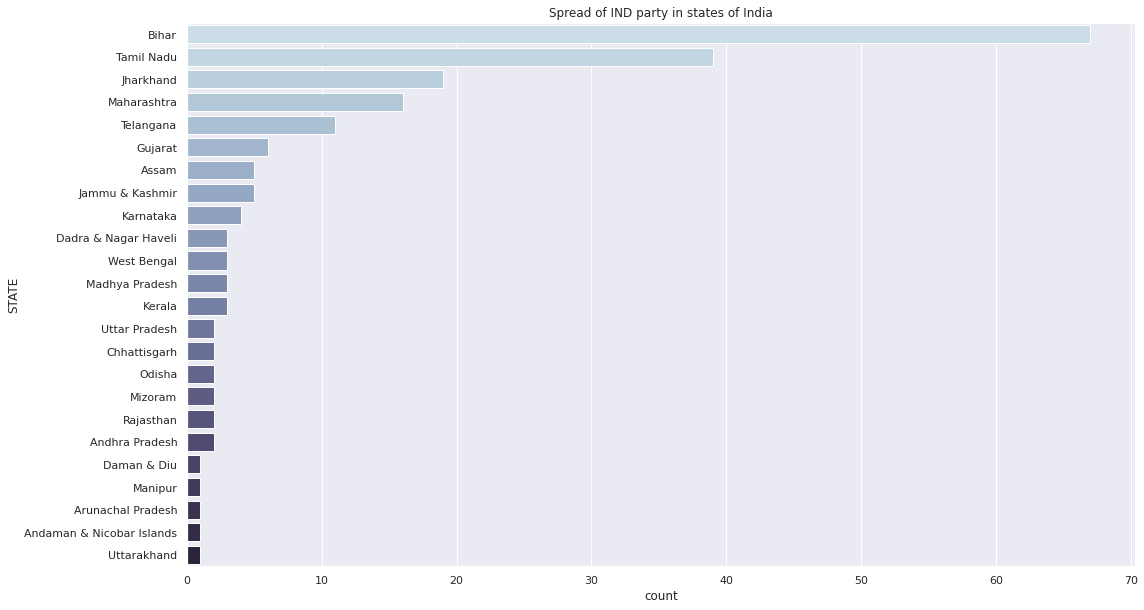

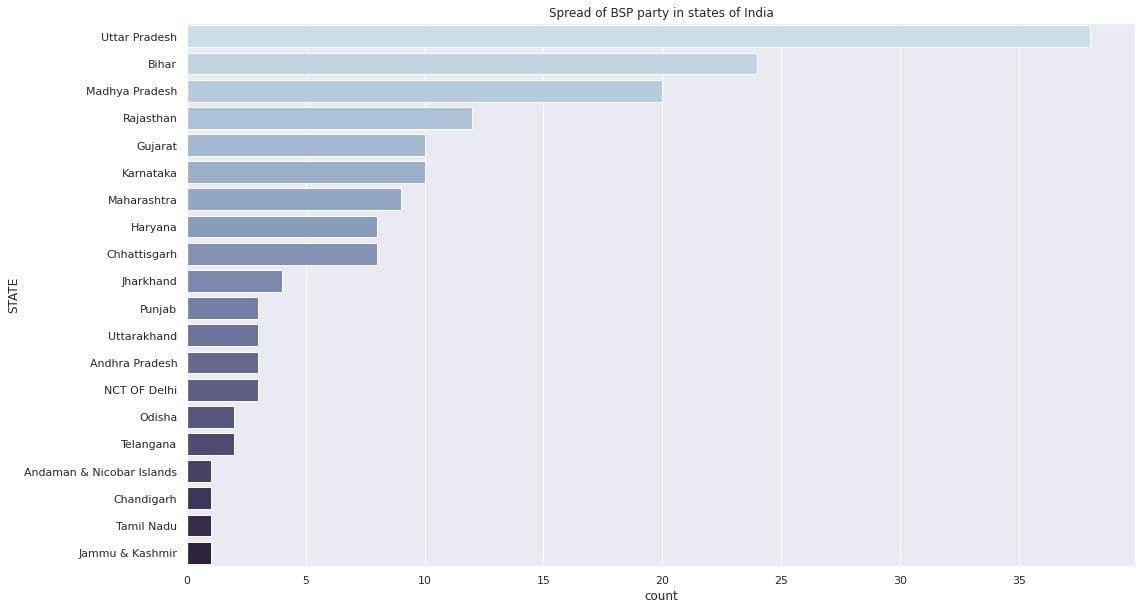

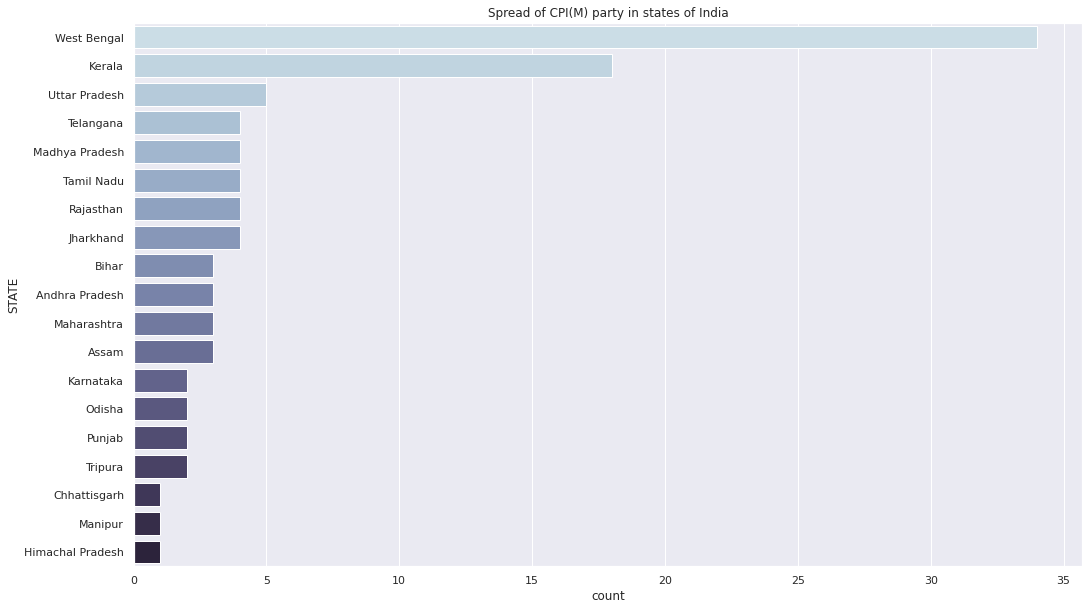

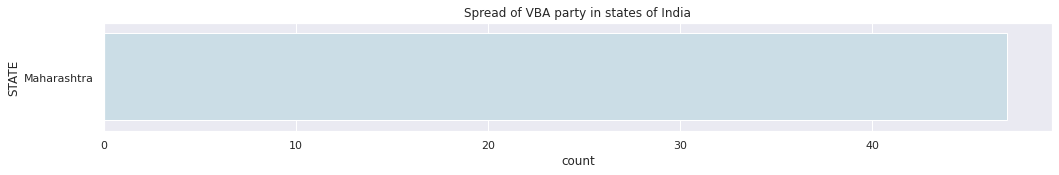

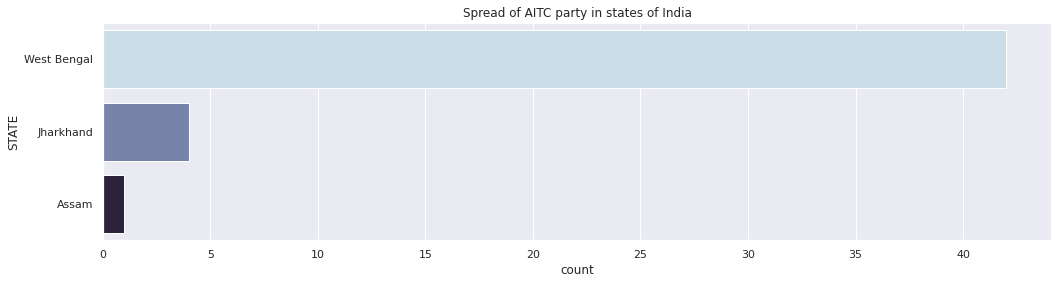

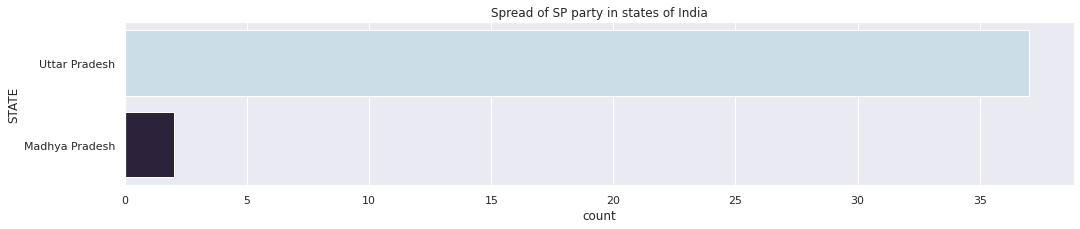

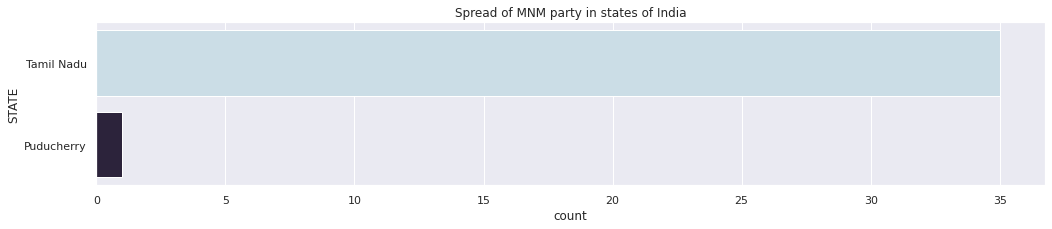

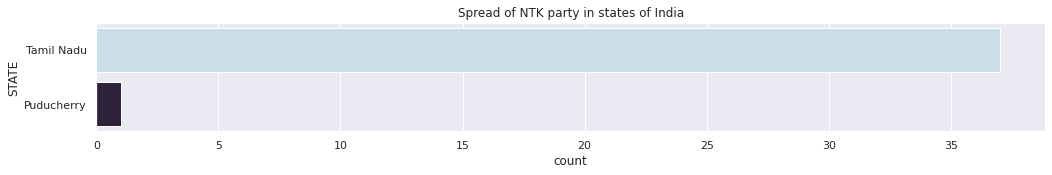

In [30]:
#######################################################
plt.figure(figsize=(17,10))
sns.set(style="darkgrid")
sns.barplot(x=bjp["STATE"],y=bjp["index"],palette="ch:s=.25,rot=-.25")
plt.xlabel("count")
plt.ylabel("STATE")
plt.title('Spread of BJP party in states of India')
plt.show()
#######################################################
plt.figure(figsize=(17,10))
sns.set(style="darkgrid")
sns.barplot(x=inc["STATE"],y=inc["index"],palette="ch:s=.25,rot=-.25")
plt.xlabel("count")
plt.ylabel("STATE")
plt.title('Spread of INC party in states of India')
plt.show()
#######################################################
plt.figure(figsize=(17,10))
sns.set(style="darkgrid")
sns.barplot(x=ind["STATE"],y=ind["index"],palette="ch:s=.25,rot=-.25")
plt.xlabel("count")
plt.ylabel("STATE")
plt.title('Spread of IND party in states of India')
plt.show()
#######################################################
plt.figure(figsize=(17,10))
sns.set(style="darkgrid")
sns.barplot(x=bsp["STATE"],y=bsp["index"],palette="ch:s=.25,rot=-.25")
plt.xlabel("count")
plt.ylabel("STATE")
plt.title('Spread of BSP party in states of India')
plt.show()
#######################################################
plt.figure(figsize=(17,10))
sns.set(style="darkgrid")
sns.barplot(x=cpi["STATE"],y=cpi["index"],palette="ch:s=.25,rot=-.25")
plt.xlabel("count")
plt.ylabel("STATE")
plt.title('Spread of CPI(M) party in states of India')
plt.show()
#######################################################
plt.figure(figsize=(17,2))
sns.set(style="darkgrid")
sns.barplot(x=vba["STATE"],y=vba["index"],palette="ch:s=.25,rot=-.25")
plt.xlabel("count")
plt.ylabel("STATE")
plt.title('Spread of VBA party in states of India')
plt.show()
#######################################################
plt.figure(figsize=(17,4))
sns.set(style="darkgrid")
sns.barplot(x=aitc["STATE"],y=aitc["index"],palette="ch:s=.25,rot=-.25")
plt.xlabel("count")
plt.ylabel("STATE")
plt.title('Spread of AITC party in states of India')
plt.show()
#######################################################
plt.figure(figsize=(17,3))
sns.set(style="darkgrid")
sns.barplot(x=sp["STATE"],y=sp["index"],palette="ch:s=.25,rot=-.25")
plt.xlabel("count")
plt.ylabel("STATE")
plt.title('Spread of SP party in states of India')
plt.show()
#######################################################
plt.figure(figsize=(17,3))
sns.set(style="darkgrid")
sns.barplot(x=mnm["STATE"],y=mnm["index"],palette="ch:s=.25,rot=-.25")
plt.xlabel("count")
plt.ylabel("STATE")
plt.title('Spread of MNM party in states of India')
plt.show()
#######################################################
plt.figure(figsize=(17,2))
sns.set(style="darkgrid")
sns.barplot(x=ntk["STATE"],y=ntk["index"],palette="ch:s=.25,rot=-.25")
plt.xlabel("count")
plt.ylabel("STATE")
plt.title('Spread of NTK party in states of India')
plt.show()

## Use Random Classifier to predict the results of the election

In [31]:
votes_df=votes[votes['PARTY']!='NOTA']
votes_df['GENDER'].replace({'MALE':1,'FEMALE':2},inplace=True)
votes_df['CATEGORY'].replace({'GENERAL':1,'SC':2,'ST':3},inplace=True)
i=1
parties_dict={}
for j in votes_df['PARTY']:
    if j in parties_dict:
        continue
    else:
        parties_dict[j]=i
        i+=1
votes_df['PARTY'].replace(parties_dict,inplace=True)
a=1
edu_dict={}
for b in votes_df['EDUCATION']:
    if b in edu_dict:
        continue
    else:
        edu_dict[b]=a
        a+=1
votes_df['EDUCATION'].replace(edu_dict,inplace=True)
df1 = votes_df[['STATE','CONSTITUENCY','WINNER','PARTY','SYMBOL','GENDER','CRIMINAL CASES','AGE','CATEGORY','EDUCATION','TOTAL VOTES','TOTAL ELECTORS','ASSETS','LIABILITIES']]
num_cols = ['PARTY','EDUCATION','CRIMINAL CASES','AGE','TOTAL VOTES','TOTAL ELECTORS','ASSETS','CATEGORY','LIABILITIES','GENDER']
dataset = pd.get_dummies(df1)

standardScaler = StandardScaler()
scaling_columns = num_cols
dataset[scaling_columns] = standardScaler.fit_transform(dataset[scaling_columns])
dataset.head()

/tmp/ipykernel_6437/173864049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  votes_df['GENDER'].replace({'MALE':1,'FEMALE':2},inplace=True)
/tmp/ipykernel_6437/173864049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  votes_df['CATEGORY'].replace({'GENERAL':1,'SC':2,'ST':3},inplace=True)
/tmp/ipykernel_6437/173864049.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  votes_df['PARTY'].replace(parties_dict,inplace=True)
/tmp/

,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,TOTAL VOTES,TOTAL ELECTORS,ASSETS,...,SYMBOL_Tiller,SYMBOL_Tractor Chalata Kisan,SYMBOL_Triangle,SYMBOL_Truck,SYMBOL_Two Leaves,SYMBOL_Tyres,SYMBOL_Umbrella,SYMBOL_Walking Stick,SYMBOL_Water Melon,SYMBOL_Whistle
0,1,-0.628979,-0.382872,6.620242,-0.023051,2.251127,-1.242514,0.332957,-0.538876,-0.311731,...,0,0,0,0,0,0,0,0,0,0
1,0,-0.583879,-0.382872,-0.190426,0.145491,2.251127,-0.872637,0.103781,-0.538876,-0.274420,...,0,0,0,0,0,0,0,0,0,0
2,0,-0.538780,-0.382872,0.202498,-0.023051,2.251127,-1.242514,0.085873,-0.538876,-0.230717,...,0,0,0,0,0,0,0,0,0,0
4,1,-0.628979,-0.382872,0.464446,0.482577,0.816718,-0.502761,1.387657,0.876978,-0.139047,...,0,0,0,0,0,0,0,0,0,0
5,0,-0.493681,-0.382872,-0.190426,-0.444408,0.816718,-0.872637,0.559766,0.876978,0.005336,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_not_winner = dataset[dataset.WINNER == 0]
df_winner = dataset[dataset.WINNER == 1]
df_winner_upsampled = resample(df_winner, replace = True,n_samples = 1452, random_state = 0) 
df_total_upsampled = pd.concat([df_not_winner, df_winner_upsampled])
df_total_upsampled.WINNER.value_counts()
y = df_total_upsampled['WINNER']
X = df_total_upsampled.drop(['WINNER'], axis = 1)
rf_scores = []
for k in range(1,60):
    randomforest_classifier= RandomForestClassifier(n_estimators=k,random_state=0)
    score=cross_val_score(randomforest_classifier,X,y,cv=10)
    rf_scores.append(score.mean())
    
randomforest_classifier= RandomForestClassifier(n_estimators=38,random_state=0)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
print('% Accuracy :', round(score.mean()*100,4))

% Accuracy : 96.2131


## Our model has Accuracy of: 96.21 %